## Airplanes crashes since 1908

 analyze and predict airplane crashes and the likelihood of surviving such a crash (although I couldn´t find any data on passenger seating so far). Goal is to answer the question wether flying really is the safest way to travel. Here is one dataset that might be of interest:

https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

Possible EDA tasks:
1. data cleaning
    1.1: remove columns with 80 or more percent of Null-values
    1.2: check the ground column to see if it only contains 0 and 1. If so convert it to a Boolean type

Questions to answer:
2. on avg. how many plane crashes happen per year?
    2.1: which year was the one with the least/most crashes?
    2.2: on avg. how many months are in between crashes?
        2.2.1: what was the longest period in between crashes?
    2.3: which Operator suffered the most crashes in history?
3. from the Route column exract start and destination and create new columns for each
    3.2: what´s the most common weekday for crashes?
4. on avg. how many passengers survive a crash (if any)? Create a new column called survival rate

Bonus:
- What were the most common causes for crashes? Could be extraced from the Summarycolumn (e.g. most common words)
- display the crash location on a map (might need longitude and latitude)
- categorize the Type column by maker (e.g. Boeing, Lockheed....)
- what´s the overall crash rate? (need to find data on total flights from 1908)

Another interesting dataset on flight delays:
https://www.kaggle.com/usdot/flight-delays

Possible ML tasks:
- predict crashes based on:
- start/destination airport
- operator
- plane type (maker/type etc..)
- predict survival rate based on:
- passenger´s seat (first class, second class ....)
- crash-site (over water, land ... )
- age, sex, ....

### First, lets open up the datafile and have a look at it...

In [1]:
import pandas as pd
import numpy as np

air_crash = pd.read_csv('/Users/Chris/Desktop/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [2]:
air_crash

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
air_crash.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

## Data cleaning

### 1.1 remove columns with 80 or more percent of Null-values 

In [4]:
print("Time is null " + str(round(((air_crash["Time"].isnull().sum()) / 5268), 2)) + " percent of the time")
print("Flight # is null " + str(round(((air_crash["Flight #"].isnull().sum()) / 5268), 2)) + " percent of the time") 
print("Registration is null " + str(round(((air_crash["Registration"].isnull().sum()) / 5268),2)) + " percent of the time")
print("cn/In is null " + str(round(((air_crash["cn/In"].isnull().sum()) / 5268),2))+ " percent of the time")
print("Ground is null " + str(round(((air_crash["Ground"].isnull().sum()) / 5268),2))+ " percent of the time")



Time is null 0.42 percent of the time
Flight # is null 0.8 percent of the time
Registration is null 0.06 percent of the time
cn/In is null 0.23 percent of the time
Ground is null 0.0 percent of the time


### It appears the our `Flight #` column is null 80% of the time. We're gonna need to delete that

In [5]:
air_crash.drop(["Flight #"], axis=1)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


### 1.2: check the ground column to see if it only contains 0 and 1. If so convert it to a Boolean type

In [6]:
air_crash["Ground"].value_counts()

0.0       5027
1.0         53
2.0         27
3.0         21
4.0         15
5.0         10
8.0         10
7.0          8
11.0         6
6.0          6
22.0         5
13.0         4
20.0         3
10.0         3
44.0         3
24.0         3
52.0         2
30.0         2
14.0         2
12.0         2
2750.0       2
70.0         2
19.0         2
47.0         2
37.0         1
31.0         1
35.0         1
49.0         1
75.0         1
63.0         1
125.0        1
23.0         1
50.0         1
36.0         1
16.0         1
54.0         1
17.0         1
113.0        1
33.0         1
58.0         1
225.0        1
107.0        1
45.0         1
32.0         1
40.0         1
9.0          1
87.0         1
18.0         1
85.0         1
15.0         1
Name: Ground, dtype: int64

### While the majority of `Ground` is 0, there are many other columns. 

We could elect to remove all non-zero rows, but our dataset description doesn't offer more insight into what these numbers mean. 

## Questions to answer:

### 2. On avg. how many plane crashes happen per year?

In [7]:
import datetime as dt

air_crash['Date']= pd.to_datetime(air_crash['Date'])

#air_crash["Date"].astype(datetime64[ns]) Alternative method

    

In [8]:
#air_crash.groupby(air_crash['Date'].dt.year).agg(['sum', 'mean', 'max'])

#air_crash.groupby(air_crash['Date'].dt.year).sum()

air_crash['Date'].dt.year.value_counts()

1972    104
1968     96
1989     95
1967     91
1973     89
       ... 
1918      4
1913      3
1915      2
1912      1
1908      1
Name: Date, Length: 98, dtype: int64

In [9]:
print("Since 1908 there are " + str(round((5268 / 98),1)) + " crashes per year!")

Since 1908 there are 53.8 crashes per year!


## 2.1: which year was the one with the least/most crashes?

Given the output above, 1972 was the highest year for crashes, with 1908 and 1912 at the lowest. It may be interesting to compare this data after the realitive comercialization of flight.

In [10]:
air_crash['Operator'].fillna('x', inplace=True)

In [11]:

air_crash.groupby(air_crash['Date'].dt.year)['Operator'].count()


Date
1908     1
1912     1
1913     3
1915     2
1916     5
        ..
2005    51
2006    49
2007    54
2008    62
2009    24
Name: Operator, Length: 98, dtype: int64

In [12]:
#import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
#still learning those tools above. Used pandas .plot for now

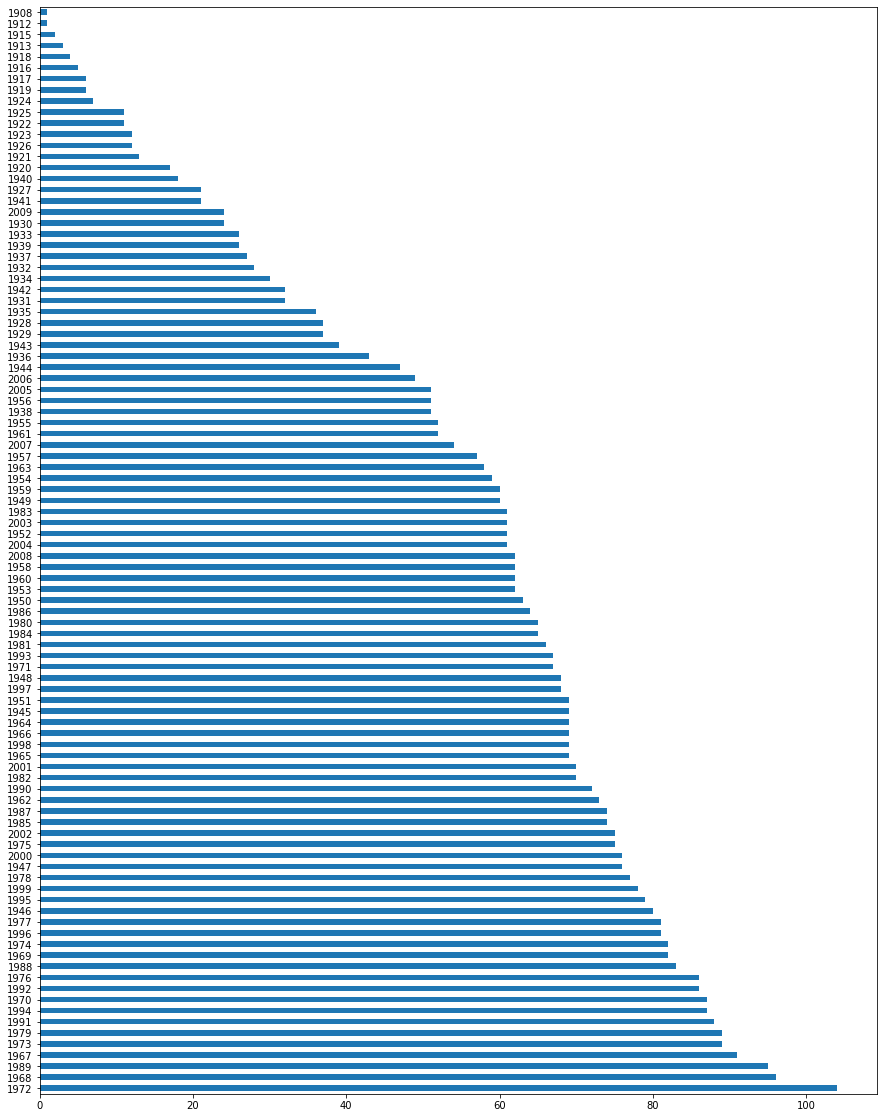

In [13]:
air_crash["year"] = air_crash["Date"].dt.year
air_crash["year"].value_counts().plot(kind='barh', figsize=(15,20))

## 2.2: on avg. how many months are in between crashes?

To calculate this, i'll need create a new column that subtracts the date from the previous row date and has an output in months

In [14]:
air_crash.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913


In [15]:
air_crash['days_last_crash'] = (air_crash['Date'] - air_crash.shift(1)['Date'])

In [16]:
air_crash.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,days_last_crash
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,NaT
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,1394 days
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,390 days


In [17]:
air_crash["days_last_crash"].describe()


count                        5267
mean       6 days 23:38:07.677995
std      310 days 19:57:28.381069
min          -7003 days +00:00:00
25%               1 days 00:00:00
50%               4 days 00:00:00
75%               8 days 00:00:00
max            7020 days 00:00:00
Name: days_last_crash, dtype: object

## Wow, it looks like there was only an average of just under 7 days between crashes!

## 2.2.1: what was the longest period in between crashes? 

The longest peroid of time beween crashes was 7020 days-- or 19 years!

In [18]:
7020 / 365

19.232876712328768

## 2.3: which Operator suffered the most crashes in history?

In [23]:
air_crash["Operator"].value_counts()

Aeroflot                                 179
Military - U.S. Air Force                176
Air France                                70
Deutsche Lufthansa                        65
United Air Lines                          44
                                        ... 
Key West Sea Plane Service - Air Taxi      1
Wehite Cap Aviation                        1
Rotorcraft Leasing Co                      1
Military - Fuerza Aérea Argentina          1
Independent Air Inc.                       1
Name: Operator, Length: 2477, dtype: int64

## The operator with the highest crash rate is Aeroflot, followed closely by the Military - U.S. Air France

## 3: from the Route column exract start and destination and create new columns for each

In [27]:
air_crash["Route"].value_counts()

Training                           81
Sightseeing                        29
Test flight                        17
Test                                6
Sao Paulo - Rio de Janeiro          5
                                   ..
Kirkland AFB - Nellis AFB           1
Perth - Port Hedland                1
Quito - Lago Agrio                  1
New York, NY - Winsor Locks, CT     1
Chita - Zeya                        1
Name: Route, Length: 3244, dtype: int64

In [32]:
# new data frame with split value columns 
#new = data["Name"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
#data["First Name"]= new[0] 
  
# making separate last name column from new data frame 
#data["Last Name"]= new[1] 
  
# Dropping old Name columns 
#data.drop(columns =["Name"], inplace = True) 

new = air_crash["Route"].str.split("-", n=1, expand=True)
air_crash["depart"]=new[0]
air_crash["arrive"]=new[1]


In [34]:
air_crash.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,days_last_crash,depart,arrive
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,NaT,Demonstration,None
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,1394 days,Test flight,None
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,390 days,NaN,NaN
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,34 days,NaN,NaN
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,38 days,NaN,NaN


In [38]:
air_crash["depart"].value_counts()

Training          81
New York City     41
Paris             34
Rome              29
Sightseeing       29
                  ..
Taiwan             1
Philidelphia       1
Bremerton          1
Ellsworth AFB      1
Bogotá             1
Name: depart, Length: 1910, dtype: int64

In [39]:
air_crash["arrive"].value_counts()

 Paris                               25
 New York City                       23
 London                              21
 Los Angeles                         21
 Chicago                             19
                                     ..
 Toronto, Canada                      1
 Loja                                 1
 Washington, District of Colombia     1
 Port Hedland                         1
 Ontairo                              1
Name: arrive, Length: 2179, dtype: int64

## 3.2: what´s the most common weekday for crashes?

In [42]:
air_crash["weekday"] = air_crash["Date"].dt.strftime('%A')

In [43]:
air_crash.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,days_last_crash,depart,arrive,weekday
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,NaT,Demonstration,None,Thursday
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,1394 days,Test flight,None,Friday
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,390 days,NaN,NaN,Wednesday
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,34 days,NaN,NaN,Tuesday
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,38 days,NaN,NaN,Friday


In [44]:
air_crash["weekday"].max()

'Wednesday'

## Oh boy, maybe consider picking a flight on a different day of the week...

## 4. on avg. how many passengers survive a crash (if any)? Create a new column called survival rate

In [54]:
air_crash["survival_count"] = air_crash["Aboard"] - air_crash["Fatalities"]

In [55]:
air_crash["survival_rate"] = air_crash["survival_count"] / air_crash["Aboard"]

In [56]:
air_crash.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,days_last_crash,depart,arrive,weekday,survival_rate,survival_count
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,NaT,Demonstration,None,Thursday,0.5,1.0
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,1394 days,Test flight,None,Friday,0.0,0.0
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,390 days,NaN,NaN,Wednesday,0.0,0.0
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,34 days,NaN,NaN,Tuesday,0.3,6.0
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,38 days,NaN,NaN,Friday,0.0,0.0


In [58]:
air_crash["survival_count"].mean()

7.471025543271064

In [59]:
air_crash["survival_rate"].mean()

0.16506840201747797

## On average 7.5 people survive a plane crash, with an overall average survival rate of 16.5%